# EDA

In [101]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'] , axis='columns')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    889 non-null    float64
 2   Sex       889 non-null    float64
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    float64
 5   Parch     889 non-null    float64
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(8)
memory usage: 55.7 KB


In [5]:
df.dropna(subset=['Embarked'], inplace=True)

Text(0, 0.5, 'Frequency')

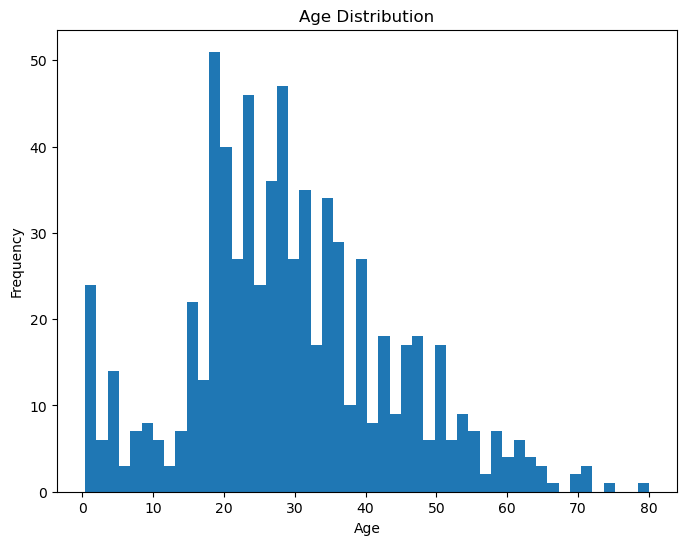

In [7]:
plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins = 50)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')

<Axes: xlabel='Fare', ylabel='Count'>

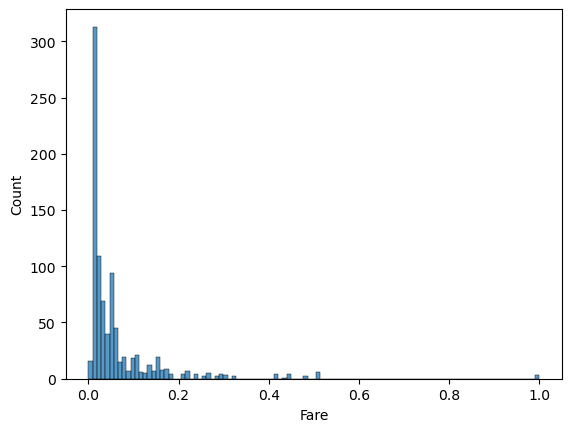

In [134]:
sns.histplot(data=df, x="Fare")

# Data preprocessing

In [129]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [130]:
#Encoding categorical values
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [132]:
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1,0.271174,1.0,0.0,0.014151,2
1,1.0,1.0,0,0.472229,1.0,0.0,0.139136,0
2,1.0,3.0,0,0.321438,0.0,0.0,0.015469,2
3,1.0,1.0,0,0.434531,1.0,0.0,0.103644,2
4,0.0,3.0,1,0.434531,0.0,0.0,0.015713,2


# Replace NaN values in Age

In [113]:
columns = df.columns
columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [9]:
from sklearn.impute import KNNImputer

In [11]:
imputer = KNNImputer(n_neighbors=2)
df = imputer.fit_transform(df)

In [12]:
df = pd.DataFrame(df, columns= columns)

Text(0, 0.5, 'Frequency')

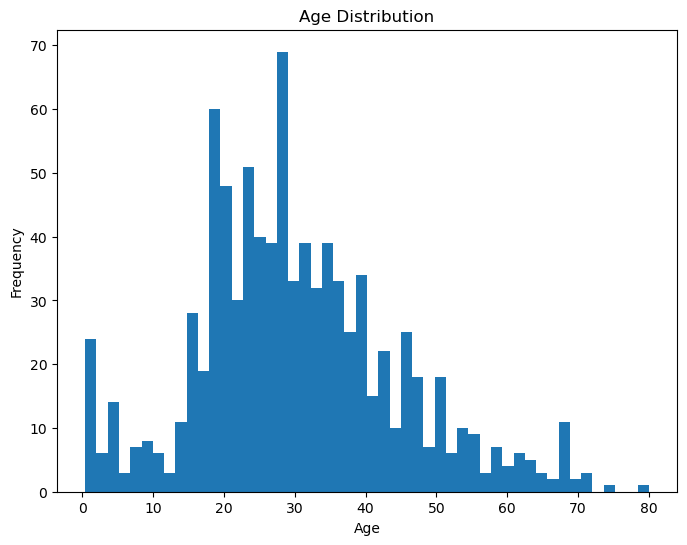

In [15]:
plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins = 50)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')

# ML Models

In [26]:
X = df.iloc[ : , 1:]
y = df.iloc[ : , 0]

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tpot import TPOTClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# LogisticRegression

In [169]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 3)
log = round(logreg.score(X_test, y_test) * 100, 3)
print("Train: ", acc_log)
print("Test: ", log)

Train:  79.466
Test:  86.517


C:\Users\youse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVC

In [152]:
SVC = SVC(kernel= 'linear', C= 1)
SVC.fit(X_train, y_train)
acc_svc = round(SVC.score(X_train, y_train) * 100, 3)
svc = round(SVC.score(X_test, y_test) * 100, 3)
print("Train: ", acc_svc)
print("Test: ", svc)

Train:  77.215
Test:  87.079


# RandomForestClassifier

In [155]:
RandomForestClassifier = RandomForestClassifier(n_estimators=100)
RandomForestClassifier.fit(X_train, y_train)
acc_random_forest = round(RandomForestClassifier.score(X_train, y_train) * 100, 3) 
random_forest = round(RandomForestClassifier.score(X_test, y_test) * 100, 3) 
print("Train: ", acc_random_forest)
print("Test: ", random_forest)

Train:  98.875
Test:  87.64


# DecisionTreeClassifier

In [156]:
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train, y_train)
acc_decision_tree = round(DecisionTreeClassifier.score(X_train, y_train) * 100, 3)
decision_tree = round(DecisionTreeClassifier.score(X_test, y_test) * 100, 3)
print("Train: ",acc_decision_tree)
print("Test: ", decision_tree)

Train:  98.875
Test:  82.584


# KNN

In [160]:
KNeighborsClassifier = KNeighborsClassifier(n_neighbors = 3)
KNeighborsClassifier.fit(X_train, y_train)
acc_knn = round(KNeighborsClassifier.score(X_train, y_train) * 100, 3)
knn = round(KNeighborsClassifier.score(X_test, y_test) * 100, 3)
print("Train: ", acc_knn)
print("Test: ", knn)

Train:  83.685
Test:  77.528


# TPOTClassifier
## To get the best pipeline

In [93]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=10)
tpot.fit(X_train, y_train)
print("Train: ", tpot.score(X_train, y_train))
print("Test: ", tpot.score(X_test, y_test))

                                                                                                                       
Generation 1 - Current best internal CV score: 0.8171771890081748
                                                                                                                       
Generation 2 - Current best internal CV score: 0.8171771890081748
                                                                                                                       
Generation 3 - Current best internal CV score: 0.8228208411307003
                                                                                                                       
Generation 4 - Current best internal CV score: 0.8228208411307003
                                                                                                                       
Generation 5 - Current best internal CV score: 0.825627893233527
                                                                       

# ExtraTreesClassifier

In [164]:
ExtraTreesClassifier = ExtraTreesClassifier(
    bootstrap=True,
    criterion='gini',
    max_features=0.65,
    min_samples_leaf=1,
    min_samples_split=6,
    n_estimators=100,
    random_state=42
)
ExtraTreesClassifier.fit(X_train, y_train)
acc_extra_tree = round(ExtraTreesClassifier.score(X_train, y_train) * 100, 3)
extra_tree = round(ExtraTreesClassifier.score(X_test, y_test) * 100, 3)
print("Train: ", acc_extra_tree)
print("Test: ", extra_tree)

Train:  90.295
Test:  89.888


## Confusion matrix to show how many times the model went wrong.

Text(70.72222222222221, 0.5, 'Truth')

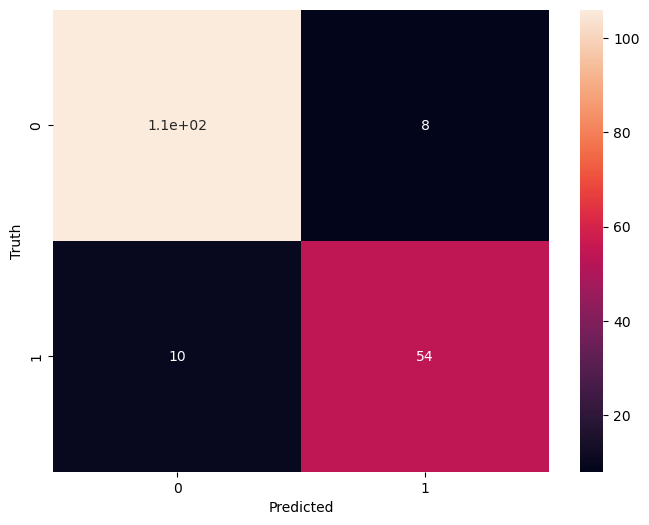

In [167]:
y_predicted = etc.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [171]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree', 'ExtraTreesClassifier'],
    
    'Training_score': [acc_svc, acc_knn, acc_log, acc_random_forest,
                       acc_decision_tree, acc_extra_tree],
    
    'Testing_score' : [svc, knn, log, random_forest,
                       decision_tree, extra_tree]})

models.sort_values(by='Testing_score', ascending=False)

,Model,Training_score,Testing_score
5,ExtraTreesClassifier,90.295,89.888
3,Random Forest,98.875,87.640
0,Support Vector Machines,77.215,87.079
2,Logistic Regression,79.466,86.517
4,Decision Tree,98.875,82.584
1,KNN,83.685,77.528


# Submission

In [123]:
test_data = pd.read_csv("test.csv")
test = test_data.drop(['PassengerId','Name','Ticket','Cabin'] , axis='columns')
test['Sex'] = encoder.fit_transform(test['Sex'])
test['Embarked'] = encoder.fit_transform(test['Embarked'])
imputer = KNNImputer(n_neighbors=2)
test = imputer.fit_transform(test)
test = pd.DataFrame(test, columns=columns[1:])
predictions = etc.predict(test)

In [124]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

# Save the model

In [172]:
import pickle

In [178]:
with open('Titanic_model','wb') as file:
    pickle.dump(ExtraTreesClassifier,file)